# 1. IMPORT

In [2]:
# for matplotlib
import numpy as np
# for visualisation
import matplotlib.pyplot as plt

# 2. DEFINITIONS

## 2.1. Constants

In [5]:
RES = {
    'x': 5,
    'y': 5,
}

## 2.1. Mirror figure

In [7]:
# get mirrored fractal along Y axis
def mirror(p_data):
    return np.stack([1 - p_data[:, 0], p_data[:, 1]], axis=1)

## 2.2. Scaling factor

In [9]:
# just a scaling coeficients for visualisation
def a_classic(n):
    return 3 ** (n + 1) - 1

In [10]:
# just a scaling coeficients for visualisation
def a_mod_1(n):
    return 3 ** (n + 1) - 1

In [11]:
# just a scaling coeficients for visualisation
def a_mod_2(n):
    return 3 ** (n + 2) - 1

## 2.3. Starting shapes

In [13]:
# starting fractal shapes
peano_mods = {
    'classic': np.array([[0,0],[0,1],[1/2,1],[1/2,0],[1,0],[1,1]]),
    'mod_1': np.array([[0,0],[0,1],[2/4,1],[2/4,3/4],[1/4,3/4],[1/4,2/4],[3/4,2/4],[3/4,1/4],[2/4,1/4],[2/4,0],[1,0],[1,1]]),
    'mod_2': np.array([[0,0],[0,1],[7/8,1],[7/8,7/8],[1/8,7/8],[1/8,2/8],[6/8,2/8],[6/8,5/8],[3/8,5/8],[3/8,4/8],[5/8,4/8],[5/8,3/8],[2/8,3/8],[2/8,6/8],[7/8,6/8],[7/8,1/8],[1/8,1/8],[1/8,0],[1,0],[1,1]]),
}

In [14]:
# starting fractal shapes
a = {
    'classic': a_classic,
    'mod_1': a_mod_1,
    'mod_2': a_mod_2,
}

## 2.4. Generate

In [16]:
def peano_curve(p_n, p_mod_id='classic'):
    # use starting shape
    if p_n == 0:
        return peano_mods[p_mod_id]

    # you cannot vstack with empty array so add sth
    # let's name it sentinel
    E = np.array([[0, 0]])

    # next depth fractal consists of 3 columns (x)
    for i in range(3):
        # and three rows (y)
        j_s = range(3)

        # if column is odd then it should be connected with previous column at top
        # so we want odd column's top lesser fractal to be placed immediately after
        # top lesser fractal of previous column in list of consecutive points to render
        # that's why we reverse
        # toggle to see the difference
        if i % 2 == 1:
            j_s = reversed(j_s)

        # for every lesser square
        for j in j_s:
            # create peano curve
            F = peano_curve(p_n - 1, p_mod_id)

            # every other fractal
            if (i + j) % 2 == 1:
                # should be mirrored
                F = mirror(F)

            # reshape it into lesser fractal and place it into right position
            # according to scaling factor
            F = F * a[p_mod_id](p_n - 1) / a[p_mod_id](p_n) + np.array([[i * (a[p_mod_id](p_n - 1) + 1) / a[p_mod_id](p_n), j * (a[p_mod_id](p_n - 1) + 1) / a[p_mod_id](p_n)]])

            # in odd columns the order of points to draw fractal should be flipped
            # it won't affect it's shape, just which points between fractals are connected
            # tggle to se difference
            if i % 2 == 1:
                F = np.flip(F, axis=0)

            # add fractal points to all points
            E = np.vstack([E, F])

    # ignore first entry as it was 'sentinel'
    return E[1:, :]

## 2.5. Plot

In [18]:
def plot_peano(p_n, p_mod_id='classic'):
    points = peano_curve(p_n, p_mod_id)
    plt.figure(figsize=(RES['x'], RES['y']))
    plt.xticks([])
    plt.yticks([])
    plt.plot(points[:,0], points[:,1])

# 3. EXAMPLES

## 3.1. Classic

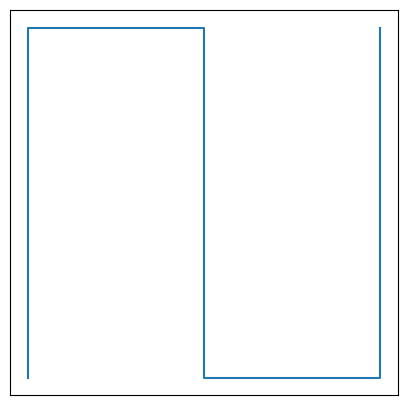

In [21]:
plot_peano(0)

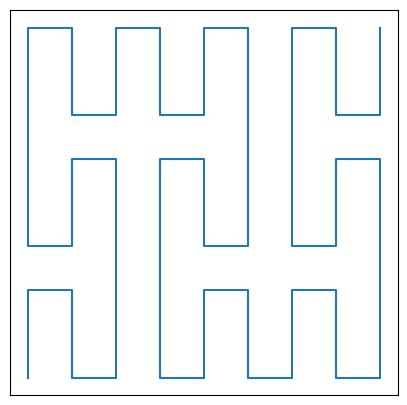

In [22]:
plot_peano(1)

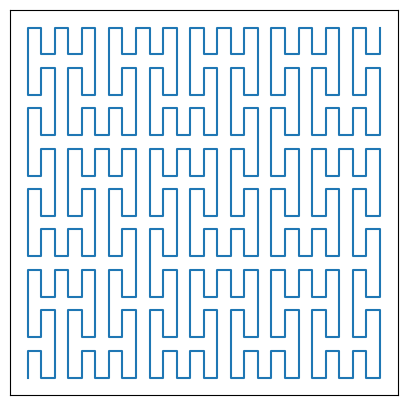

In [23]:
plot_peano(2)

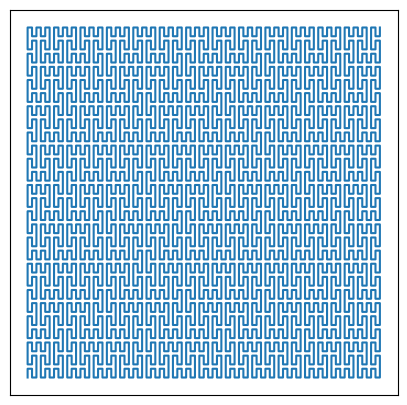

In [24]:
plot_peano(3)

## 3.2. Modification 1

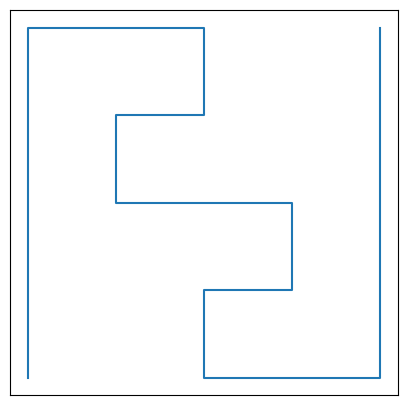

In [26]:
plot_peano(0, 'mod_1')

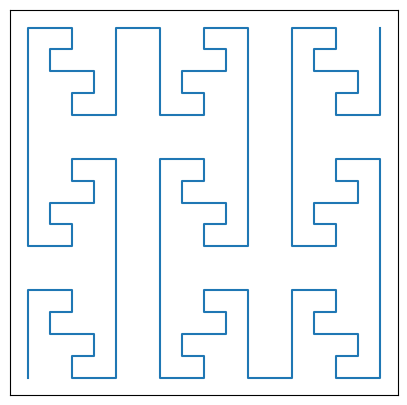

In [27]:
plot_peano(1, 'mod_1')

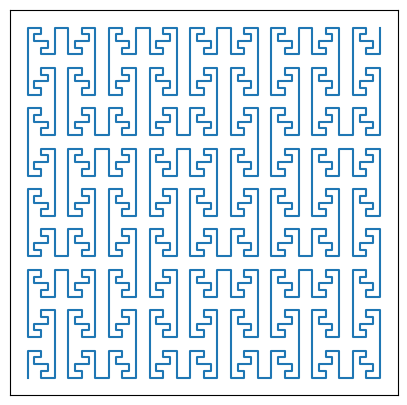

In [28]:
plot_peano(2, 'mod_1')

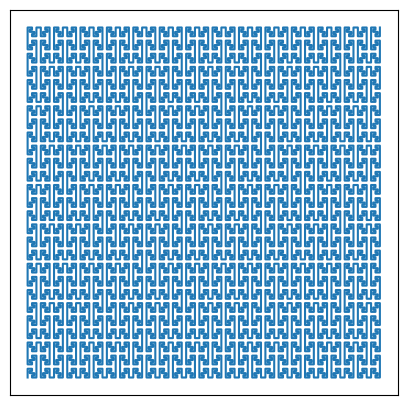

In [29]:
plot_peano(3, 'mod_1')

## 3.3. Modification 2

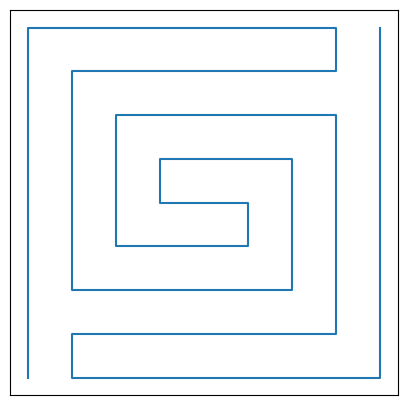

In [31]:
plot_peano(0, 'mod_2')

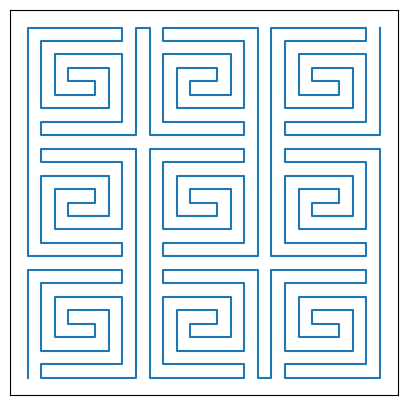

In [32]:
plot_peano(1, 'mod_2')

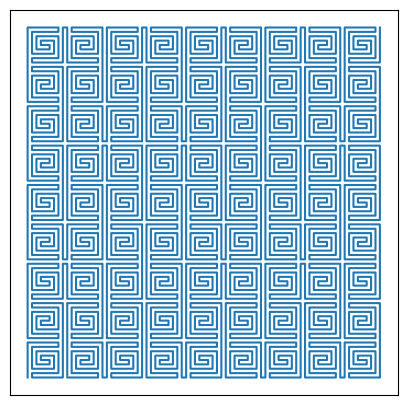

In [33]:
plot_peano(2, 'mod_2')

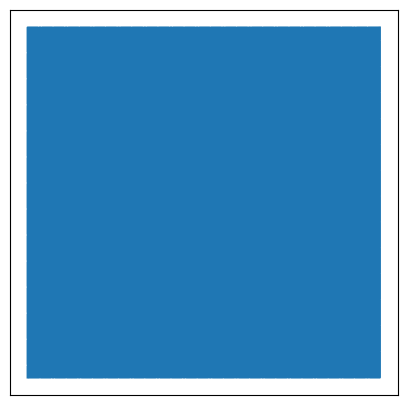

In [34]:
plot_peano(3, 'mod_2')